# People assignment EdX MOOC: Delft EX101x Data Analysis

## 1. Data preparation

In [1]:
# We'll need some modules
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# People data: name, age, city, gender
pp = pd.read_csv("Data/8.3.csv")
pp.head()

,name,age,city,gender
0,Sharon Rogers,24,Amsterdam,Female
1,Victor Phillips,25,Belgrade,Male
2,Pamela Butler,21,Cairo,Female
3,Barbara Moore,30,Toronto,Female
4,Angela Roberts,23,Shanghai,Female


In [3]:
print("Number of people in these data: {}".format(len(pp)))

Number of people in these data: 50


In [4]:
pp.tail()

,name,age,city,gender
45,Bruce Ward,21,Paris,Male
46,Joe Reed,24,San Francisco,Male
47,Kathleen Foster,27,Belgrade,Female
48,Carolyn Edwards,21,Sydney,Female
49,Bonnie Lewis,24,Amsterdam,Female


In [5]:
# People's hobbies
hob = pd.read_csv("Data/8.3_hobbies.csv")
hob.head()

,name,hobby
0,Sharon Rogers,Gaming
1,Victor Phillips,Turtles
2,Pamela Butler,Dancing
3,Barbara Moore,Movies
4,Angela Roberts,Spreadsheets


In [6]:
hob.tail()

,name,hobby
195,Bruce Ward,Tennis
196,Joe Reed,Football
197,Kathleen Foster,Basketball
198,Carolyn Edwards,Gaming
199,Bonnie Lewis,Turtles


In [7]:
# most common hobbies?
hob.hobby.value_counts()

Turtles          19
Gaming           19
Drinking beer    18
Tennis           18
Football         18
Robots design    18
Dancing          18
Teaching         18
Movies           18
Spreadsheets     18
Basketball       18
Name: hobby, dtype: int64

In [8]:
# how many hobbies do people have?
hob.name.value_counts()

Kelly Davis             4
Christina Thompson      4
Jack Russell            4
Alan Cook               4
Annie Long              4
Ronald Young            4
Anthony Jenkins         4
Nancy Bryant            4
Bruce Ward              4
Carolyn Edwards         4
Billy Lee               4
Theresa Mitchell        4
Kathleen Foster         4
Gregory Lopez           4
Felienne Hermans        4
Jeremy Martinez         4
Margaret Clark          4
Carlos Watson           4
Fred Murphy             4
Brandon Patterson       4
Janice Hughes           4
Angela Roberts          4
Teresa Barnes           4
Barbara Moore           4
Ruby Jones              4
Lillian Allen           4
Christopher Williams    4
Laura Hall              4
Elizabeth Morgan        4
Beverly Stewart         4
Victor Phillips         4
Patricia Perez          4
Amy Bennett             4
Frank Parker            4
Sharon Rogers           4
Sandra Sanchez          4
Shirley Evans           4
Betty Rivera            4
Justin King 

## Time to prepare the graph

In [29]:
# Let's create some edges
pp_ages = zip(pp.name, pp.age)
pp_cities = zip(pp.name, pp.city)
pp_genders = zip(pp.name, pp.gender)
pp_hobbies = zip(hob.name, hob.hobby)

In [30]:
# Create a graph and add nodes
G = nx.Graph()
G.add_nodes_from(pp.name, color="red", category="person")
G.add_nodes_from(pp.city, color="blue", category="city")
G.add_nodes_from(pp.gender, color="green", category="gender")
G.add_nodes_from(hob.hobby, color="yellow", category="hobby")
G.add_nodes_from(pp.age, color="cyan", category="age")

In [31]:
# Link up the nodes
G.add_edges_from(pp_ages)
G.add_edges_from(pp_cities)
G.add_edges_from(pp_genders)
G.add_edges_from(pp_hobbies)

In [32]:
# Now the graph should be set up.

## Graph exploration

In [33]:
print("Total number of nodes: {}".format(G.number_of_nodes()))
print("Total number of edges: {}".format(G.number_of_edges()))
# number of edges is 350 here, but quiz states it is 348.

Total number of nodes: 84
Total number of edges: 350


In [34]:
color_map = []
for n in G.nodes():
    color_map.append(G.node[n]['color'])

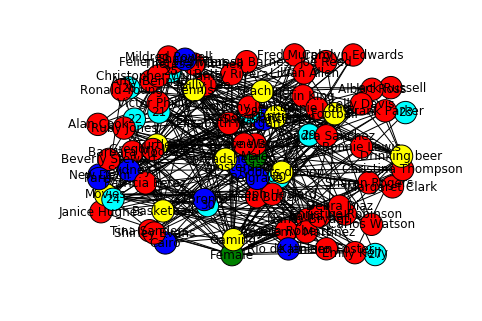

In [35]:
nx.draw_random(G, node_color=color_map, with_labels=True, node_size=500)

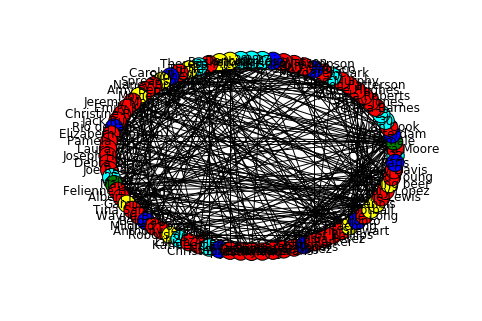

In [36]:
nx.draw_shell(G, node_color=color_map, with_labels=True)

In [44]:
# How to access node attributes?
for n in G.nodes()[0:5]:
    print(G.node[n]["color"])

print("\n")
    
for n in G.nodes()[0:5]:
    print(G.node[n]["category"])

cyan
red
green
blue
red


age
person
gender
city
person


## Quiz 8.3

In [39]:
# How many people live in Belgrade?
len(G.neighbors("Belgrade"))

7

In [40]:
# How many people of age 24 like dancing?
tw4 = G.neighbors(24)
dancing = G.neighbors("Dancing")
tw4_dancing = [x for x in tw4 if x in dancing]
len(tw4_dancing)

3

In [45]:
# Who of the following people live in Toronto?
toronto = G.neighbors("Toronto")
for person in toronto:
    print(person)
    

Janice Hughes
Fred Murphy
Barbara Moore
Betty Rivera
Annie Long
Patricia Perez
Felienne Hermans


In [74]:
# What is the common hobby of people who live in Shanghai?
# It's not a very elegant solution, I had trouble to find the 'network way' of solving this
in_shanghai = G.neighbors("Shanghai")
common_hobbies = []
for person in in_shanghai:
    hobbies = [x for x in G.neighbors(person) if G.node[x]["category"]=="hobby"]
    for hobby in hobbies:
        common_hobbies.append(hobby)

for hobby in set(common_hobbies):
    if common_hobbies.count(hobby) >= 2:
        print("{} is shared by at least two people: {}".format(hobby, common_hobbies.count(hobby)))

Gaming is shared by at least two people: 2
Turtles is shared by at least two people: 2
Dancing is shared by at least two people: 2
Robots design is shared by at least two people: 2
Tennis is shared by at least two people: 2


In [75]:
# What is the common age of people who live in Belgrade?
belgrade = G.neighbors("Belgrade")
common_ages = []
for person in belgrade:
    ages = [x for x in G.neighbors(person) if G.node[x]["category"]=="age"]
    for age in ages:
        common_ages.append(age)

for age in set(common_ages):
    if common_ages.count(age) >= 2:
        print("{} is shared by at least two people: {}".format(age, common_ages.count(age)))

28 is shared by at least two people: 2
29 is shared by at least two people: 2


In [78]:
# Who of the following people is on the shortest path from dancing to Amsterdam?
nx.shortest_path(G, "Dancing", "Amsterdam")

['Dancing', 'Margaret Clark', 'Amsterdam']

In [80]:
#What is the length of the shortest path between dancing and Amsterdam?
nx.shortest_path_length(G, "Dancing", "Amsterdam")

2